# Import libraries

In [107]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.

In [108]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import glob
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import shutil
import tensorflow as tf
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from PIL import Image
from sklearn.metrics import confusion_matrix
import itertools
from matplotlib.image import imread

## Prepare the forth model (AlexNet_Architecture) = classifier

In [109]:
def create_model():
    # Initialising the CNN
    classifier = Sequential()
    # Step 1 - Convolution
    classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
    # Step 2 - Pooling
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    # Adding a second convolutional layer
    classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    # Step 3 - Flattening
    classifier.add(Flatten())
    # Step 4 - Full connection
    classifier.add(Dense(units = 128, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    # Compiling the CNN
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    # Part 2 - Fitting the CNN to the images
    return(classifier)

## Model_Summary

In [122]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

## Using new data ( removing the VGG16 from the ImageDataGenerator)

In [123]:
def training_data(path):
    from keras.preprocessing.image import ImageDataGenerator
    train_datagen = ImageDataGenerator(rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
    # Preparing data for the training 
    training_set = train_datagen.flow_from_directory(path,
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary')
    return(training_set)

In [112]:
training_set=training_data(r"C:\\Users\\user\\Desktop\\std 21-22\\Informatique avancée\\weather_database\\train")

Found 8000 images belonging to 2 classes.


In [72]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

### Preparing data for the training 

In [73]:
training_set = train_datagen.flow_from_directory(r"C:\\Users\\user\\Desktop\\std 21-22\\Informatique avancée\\weather_database\\train",
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Testing_data

In [133]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [134]:
test_set = test_datagen.flow_from_directory(r"C:\\Users\\user\\Desktop\\std 21-22\\Informatique avancée\\weather_database\\test",
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')

Found 1000 images belonging to 2 classes.


### Validation_data

In [126]:
valid_set=training_data(r"C:\\Users\\user\\Desktop\\std 21-22\\Informatique avancée\\weather_database\\valid")

Found 1000 images belonging to 2 classes.


In [116]:
training_set.class_indices

{'cloudy': 0, 'sunny': 1}

In [117]:
training_set.classes

array([0, 0, 0, ..., 1, 1, 1])

In [15]:
def callbacks(path):
    checkpoint_path= path
    checkpoint_dir= os.path.dirname (checkpoint_path)
    cp_callback = tf.keras.callbacks.ModelCheckpoint (checkpoint_path,save_weights_only=True, verbose= 1)
    return(cp_callback)
cp_callbacks=callbacks("C:\\Users\\user\\Desktop")


In [16]:
classifier.fit_generator(training_set,
steps_per_epoch = 200,
epochs = 20,
validation_data = valid_set,
validation_steps = 20,
callbacks = [cp_callbacks])


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
200/200 [==============================] - ETA: 0s - loss: 0.4402 - accuracy: 0.7800
Epoch 00001: saving model to C:\Users\user\Desktop
200/200 [==============================] - 161s 806ms/step - loss: 0.4402 - accuracy: 0.7800 - val_loss: 0.2873 - val_accuracy: 0.8641
Epoch 2/20
200/200 [==============================] - ETA: 0s - loss: 0.3480 - accuracy: 0.8445
Epoch 00002: saving model to C:\Users\user\Desktop
200/200 [==============================] - 83s 416ms/step - loss: 0.3480 - accuracy: 0.8445 - val_loss: 0.3613 - val_accuracy: 0.8516
Epoch 3/20
200/200 [==============================] - ETA: 0s - loss: 0.3167 - accuracy: 0.8605
Epoch 00003: saving model to C:\Users\user\Desktop
200/200 [==============================] - 62s 308ms/step - loss: 0.3167 - accuracy: 0.8605 - val_loss: 0.2691 - val_accuracy: 0.8781
Epoch 4/20
200/200 [==============================] - ETA: 0s - loss: 0.3063 - a

In [127]:
classifier=create_model()

In [128]:
def callmodel(model,checkpoint_path):
    model.load_weights(checkpoint_path)

In [129]:
callmodel(classifier,"C:\\Users\\user\\Desktop")

In [130]:
loss, acc = classifier.evaluate(test_imgs, test_labels)
print('restored model, accuracy: {:5.2f}.format(100*acc)')

1/1 [==============================] - 0s 16ms/step - loss: 0.2978 - accuracy: 0.8125
restored model, accuracy: {:5.2f}.format(100*acc)


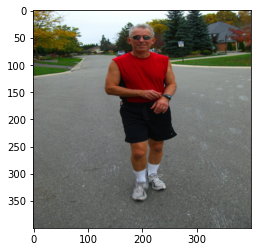

In [131]:
image = Image.open(r"C:\\Users\\user\\Desktop\\std 21-22\\Informatique avancée\\weather_database\\test\\cloudy\\cloudy.0004.jpg")
new_image = image.resize((400, 400))
#img2=image.load_img(r"C:\\Users\\user\\Desktop\\std 21-22\\Informatique avancée\\weather_database\\test\\cloudy\\cloudy.0004.jpg")
plt.imshow(new_image)
plt.show()

In [135]:
test_imgs, test_labels = next(test_set)

In [84]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

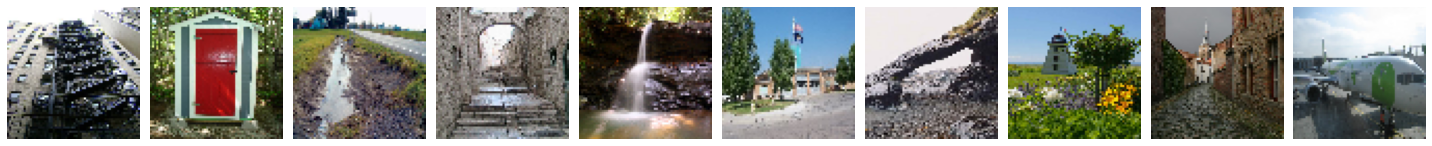

[0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 0. 1.]


In [85]:
plotImages(test_imgs)
print(test_labels)

In [86]:
predictions1 =classifier.predict(x=test_imgs, steps=len(test_imgs), verbose=0)

In [88]:
pred1=np.round(predictions1)
pred1

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

### Confusion Matrix 

In [89]:
cm1 = confusion_matrix(y_true=test_labels, y_pred=pred1)
print(cm1)

[[15  1]
 [ 5 11]]


### Function to plot the Confusion Matrix

In [90]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [91]:
cm_plot_labels = ['cloudy','sunny']

### Ploting the Confusion Matrix

Confusion matrix, without normalization
[[15  1]
 [ 5 11]]


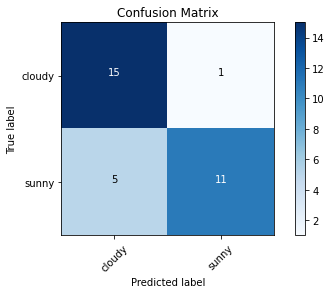

In [92]:
plot_confusion_matrix(cm=cm1, classes=cm_plot_labels, title='Confusion Matrix')

In [93]:
def trans(pred):
    if pred==0:
        print("            the weather is cloudy")
    else :
        print("            the weather is sunny ")

In [94]:
def TheWeather(path,model):
    img=image.load_img(path)
    plt.imshow(img)
    plt.show()
    new_image = img.resize((64, 64),3)
    i = image.img_to_array(new_image)/255
    input_arr = np.array([i])  #expand dimension for proper model input
    p=model.predict(input_arr, verbose=0)
    pred=np.round(p)
    trans(pred)
    

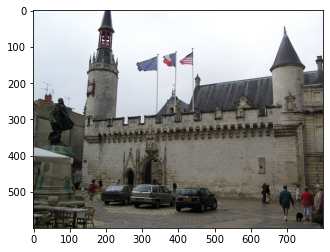

            the weather is cloudy


In [97]:
TheWeather(r"C:\\Users\\user\\Desktop\\std 21-22\\Informatique avancée\\weather_database\\test\\cloudy\\cloudy.0008.jpg",classifier)

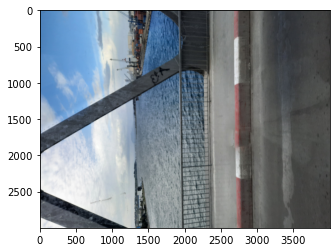

            the weather is sunny 


In [98]:
TheWeather(r"C:\\Users\\user\\Desktop\\std 21-22\\Controle de stage\\oued_zitoun2.jpg",classifier)

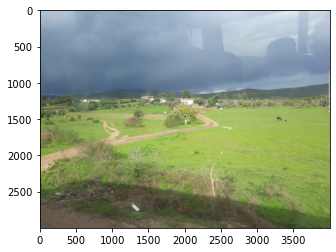

            the weather is cloudy


In [99]:
TheWeather(r"C:\\Users\\user\\Desktop\\std 21-22\\Controle de stage\\oued_zitoun.jpg",classifier)